In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [20]:
farm_data = pd.read_csv('/content/drive/MyDrive/作品集_古書瑋/tea_env_data.csv',encoding='utf-8')#, usecols=['土壤溫度']


In [21]:
SoilTemp = farm_data[["土壤溫度"]].dropna().to_numpy()

In [22]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [23]:
SoilTemp

array([[21.03389843],
       [20.91079511],
       [20.7579545 ],
       [20.56306842],
       [20.46666654],
       [20.49886363],
       [20.59375036],
       [20.87102243],
       [21.28192096],
       [21.65657159],
       [22.05085697],
       [22.40287319],
       [22.65454557],
       [23.07586236],
       [23.22571466],
       [23.14659147],
       [22.98124993],
       [22.81420414],
       [22.59886401],
       [22.5       ],
       [22.44602252],
       [22.38361538],
       [22.29545385],
       [22.20454615],
       [22.20000076],
       [22.13238687],
       [22.06931845],
       [22.        ],
       [22.05706236],
       [22.10000038],
       [22.03446341],
       [22.09261399],
       [22.39545431],
       [22.79374986],
       [23.23615788],
       [23.56647723],
       [24.39374968],
       [24.38124955],
       [24.30738563],
       [23.92159114],
       [23.40227235],
       [23.23352297],
       [23.10339022],
       [23.05340929],
       [23.        ],
       [22

In [24]:
SoilTemp.shape

(2987, 1)

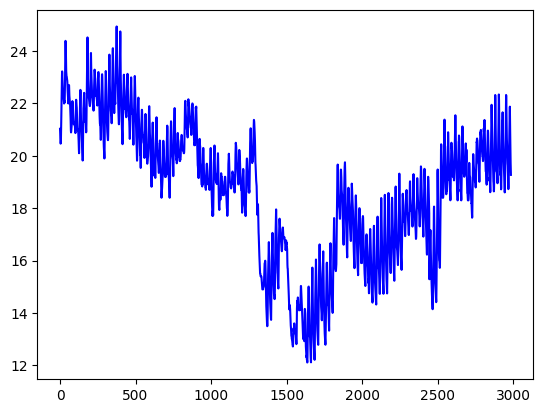

In [25]:
import matplotlib.pyplot as plt
plt.plot(SoilTemp, 'b')   # red line without marker
plt.show()

In [26]:
from numpy import array
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [27]:
# 土壤溼度資料
raw_seq = SoilTemp
# choose a number of time steps
#n_steps = 3
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
print(X)
print(X.shape)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 1
#n_steps = 3
n_steps = 3
X = X.reshape((X.shape[0], 1, n_steps))
print(X.shape)
print(X)

X_train=X[0:2000]
X_test=y[0:2000]
Y_train=X[2000:2987]
Y_test=y[2000:2987]

[[[21.03389843]
  [20.91079511]
  [20.7579545 ]]

 [[20.91079511]
  [20.7579545 ]
  [20.56306842]]

 [[20.7579545 ]
  [20.56306842]
  [20.46666654]]

 [[20.56306842]
  [20.46666654]
  [20.49886363]]

 [[20.46666654]
  [20.49886363]
  [20.59375036]]

 [[20.49886363]
  [20.59375036]
  [20.87102243]]

 [[20.59375036]
  [20.87102243]
  [21.28192096]]

 [[20.87102243]
  [21.28192096]
  [21.65657159]]

 [[21.28192096]
  [21.65657159]
  [22.05085697]]

 [[21.65657159]
  [22.05085697]
  [22.40287319]]

 [[22.05085697]
  [22.40287319]
  [22.65454557]]

 [[22.40287319]
  [22.65454557]
  [23.07586236]]

 [[22.65454557]
  [23.07586236]
  [23.22571466]]

 [[23.07586236]
  [23.22571466]
  [23.14659147]]

 [[23.22571466]
  [23.14659147]
  [22.98124993]]

 [[23.14659147]
  [22.98124993]
  [22.81420414]]

 [[22.98124993]
  [22.81420414]
  [22.59886401]]

 [[22.81420414]
  [22.59886401]
  [22.5       ]]

 [[22.59886401]
  [22.5       ]
  [22.44602252]]

 [[22.5       ]
  [22.44602252]
  [22.38361538]]



In [28]:
X_train.shape

(2000, 1, 3)

In [29]:
# create and fit the LSTM network
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow import keras
look_back = 3
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, X_test, epochs=20, batch_size=1, verbose=2)
model.summary()




Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2000/2000 - 5s - 3ms/step - loss: 51.8507
Epoch 2/20
2000/2000 - 4s - 2ms/step - loss: 2.3292
Epoch 3/20
2000/2000 - 4s - 2ms/step - loss: 0.6023
Epoch 4/20
2000/2000 - 3s - 1ms/step - loss: 0.3546
Epoch 5/20
2000/2000 - 6s - 3ms/step - loss: 0.2290
Epoch 6/20
2000/2000 - 3s - 1ms/step - loss: 0.1675
Epoch 7/20
2000/2000 - 3s - 1ms/step - loss: 0.1367
Epoch 8/20
2000/2000 - 6s - 3ms/step - loss: 0.1136
Epoch 9/20
2000/2000 - 4s - 2ms/step - loss: 0.0999
Epoch 10/20
2000/2000 - 5s - 3ms/step - loss: 0.0922
Epoch 11/20
2000/2000 - 4s - 2ms/step - loss: 0.0893
Epoch 12/20
2000/2000 - 4s - 2ms/step - loss: 0.0805
Epoch 13/20
2000/2000 - 4s - 2ms/step - loss: 0.0757
Epoch 14/20
2000/2000 - 3s - 1ms/step - loss: 0.0780
Epoch 15/20
2000/2000 - 3s - 1ms/step - loss: 0.0681
Epoch 16/20
2000/2000 - 5s - 3ms/step - loss: 0.0736
Epoch 17/20
2000/2000 - 3s - 1ms/step - loss: 0.0700
Epoch 18/20
2000/2000 - 6s - 3ms/step - loss: 0.0660
Epoch 19/20
2000/2000 - 5s - 2ms/step - loss: 0.0628
Epoch 20/20


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 20)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,825 (22.76 KB)

 Trainable params: 1,941 (7.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,884 (15.18 KB)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


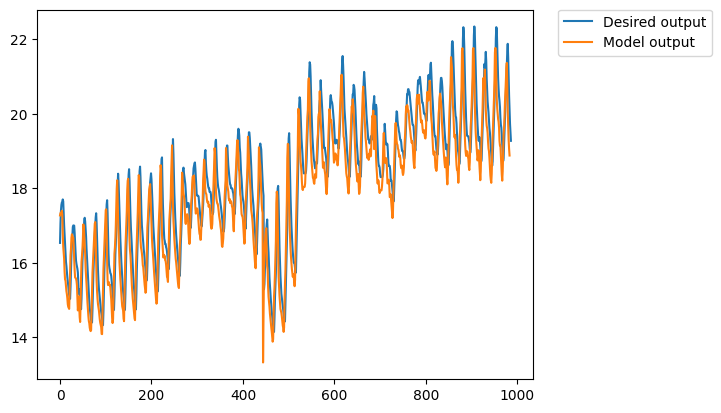

In [30]:
plt.plot(SoilTemp[2000:2987], label="Desired output")
plt.plot(model.predict(Y_train), label="Model output")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()